<a href="https://colab.research.google.com/github/Naeem2121870/BIG-DATA/blob/main/WEEK_4_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1 Margins and Decision Boundary**

1.1.1 Linear Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# this code generate random dataset representing two different classes

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# store it in a data frame
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,3.353209,1.699580,1
1,1.366786,0.634972,1
2,0.224593,4.770282,0
3,0.443599,3.115309,0
4,2.768085,1.087829,1


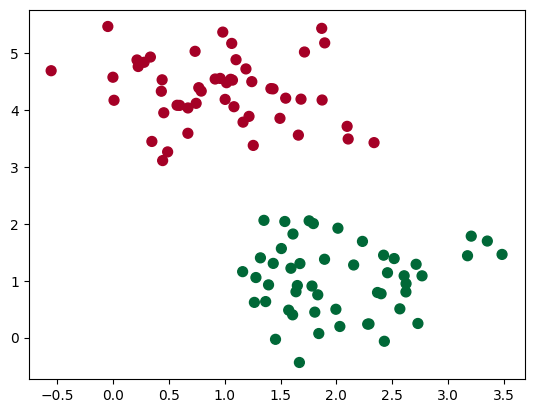

In [5]:
# plot x, and y
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn');

<ipython-input-6-dc37e0e81dd0>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1,3,5);


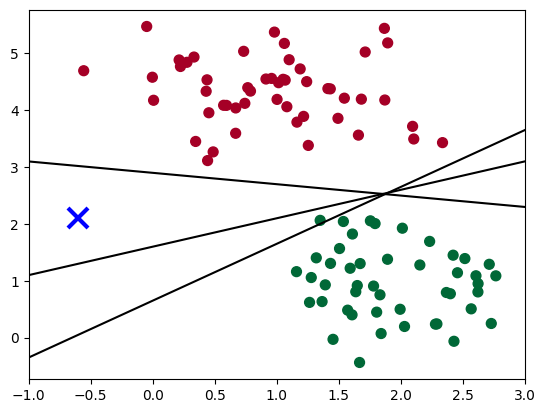

In [6]:
xfit = np.linspace (-1,3,5)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
plt.plot([-0.6], [2.1], 'x', color='blue', markeredgewidth=3, markersize=15)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m*xfit +b, '-k')
  plt.xlim(-1,3,5);

1.1.2 Linear SVM

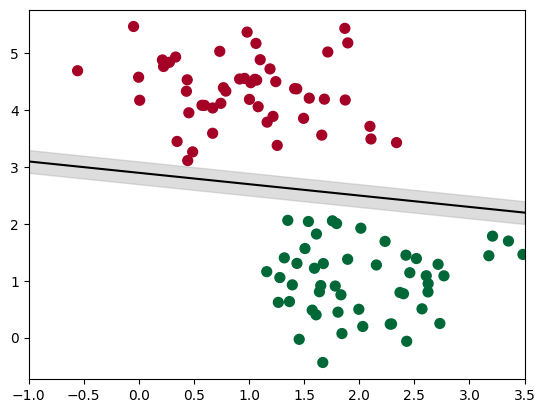

In [8]:
# create a set of evenly spaced numbers
xfit = np.linspace(-1, 3.5)
# plot the points in the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
# fit lines to the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
plt.plot(xfit, yfit, '-k')
plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                 color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

1.1.3 Create and Fit SVM Model

In [11]:
from sklearn.svm import SVC #support vector classifier
#create a model with linear kerenal
model = SVC(kernel='linear', C=1E10)
#fit the model in the data above
model.fit (X,y)

SVC(C=10000000000.0, kernel='linear')

In [17]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  # linespace create evenly spaced numbers
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy= np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  # plot decision boundary and margins
  ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])

  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none')

  plt.plot([1], [3.057891], 'o', color='green', markeredgewidth=1, markersize=7)
  plt.plot([1], [3.0505791], 'o', color='green', markeredgewidth=1, markersize=7)

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

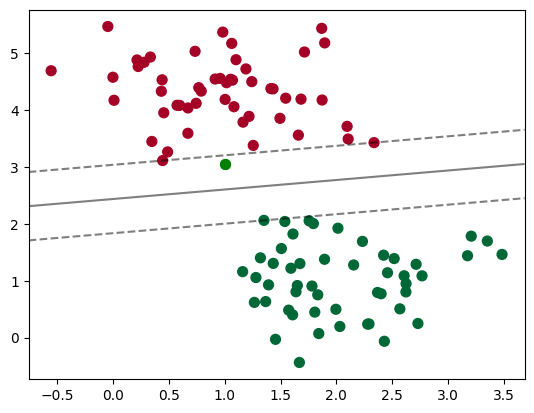

In [18]:
#plot the points
plt.scatter (X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
#plot the model decision boundary (margins)
plot_svc_decision_function(model)

# **Nonlinear Data**

In [22]:
# import necessary libraries
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [23]:
# generate the data
X, y = make_moons(n_samples=200, noise = 0.15)

In [19]:
# lets store the data in a data frame
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,3.353209,1.699580,1
1,1.366786,0.634972,1
2,0.224593,4.770282,0
3,0.443599,3.115309,0
4,2.768085,1.087829,1


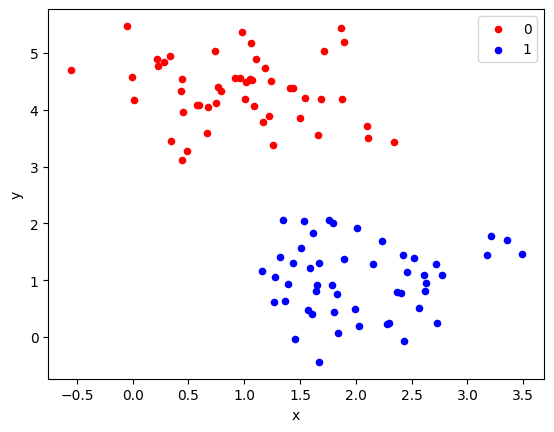

In [24]:
# now lets plot the data
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
# create two groups of data based on the label
grouped = df.groupby('label')
# plot each group of data with different color
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

In [27]:
# create a pipeline for pre-processing and fit the model
poly_kernel = Pipeline([
    # features of degree three x, x^2 and x^3
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_model", SVC(kernel='poly', gamma="auto", degree=3, coef0=1, C=5))
])

In [28]:
# now fit the data to the model
clf_poly = poly_kernel.fit(X,y)

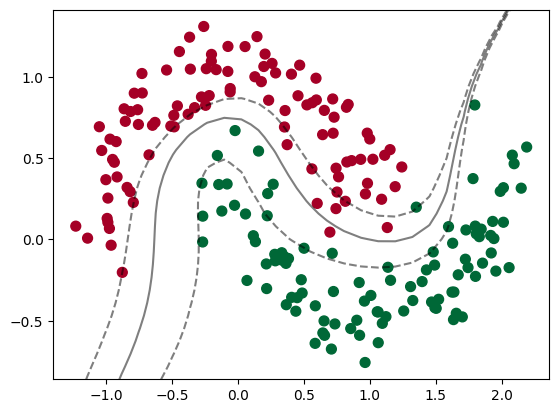

In [29]:
# lets plot the results and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
plot_svc_decision_function(clf_poly, plot_support=False)

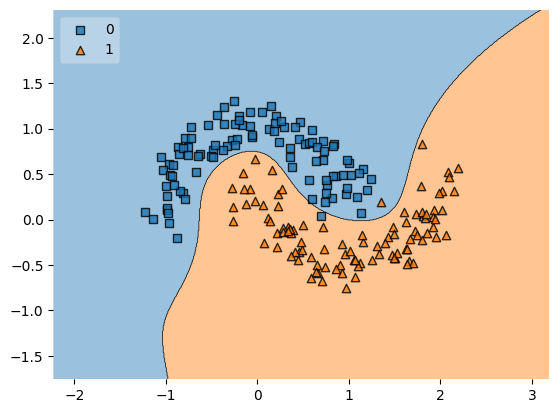

In [30]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf_poly, legend=2)
plt.show()

## **Kernel Methods**

**Guassian RBF Kernel**

In [31]:
# create a pipeline for pre-processing and fitting the model
rbf_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_model", SVC(kernel='rbf', gamma=7, C=0.013))
])

In [33]:
# now fit the data to the model
clf_rbf = rbf_kernel.fit(X,y)

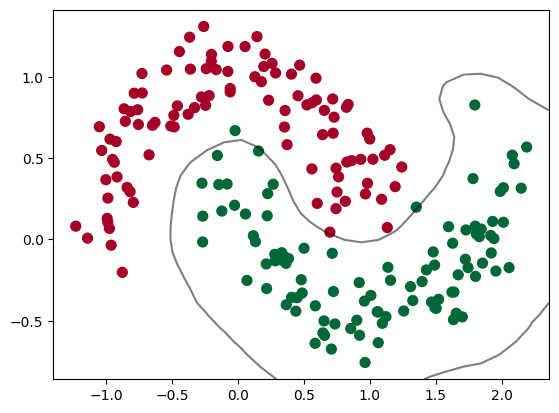

In [34]:
# lets plot the results and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
plot_svc_decision_function(clf_rbf, plot_support=False)

## **Complete Example with SVM**

# **Load Data**

In [35]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.datasets import fetch_lfw_people # this is the dataset
# get the data, with 60 images per person
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


# Explore the Dataset

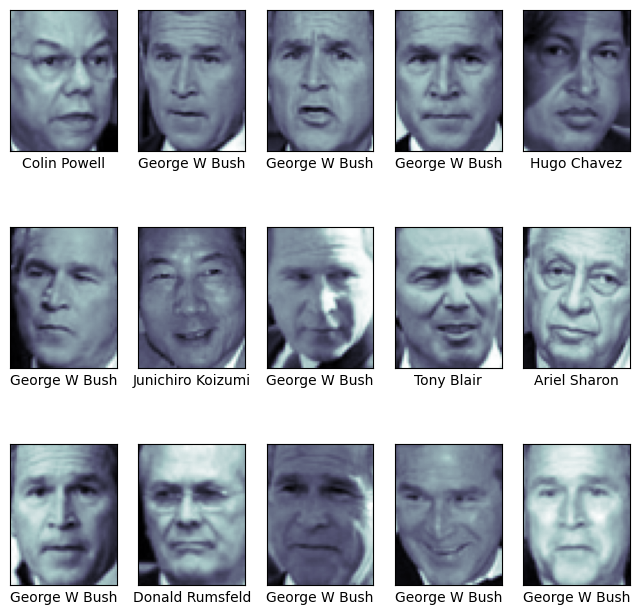

In [36]:
# create grid of 5 x 3 to show images
fig, ax = plt.subplots(3, 5, figsize=(8,8))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[],
          xlabel=faces.target_names[faces.target[i]])

## Pre-process and Model's Creation

In [37]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# create dimenssion reduction
pca = PCA(n_components=150, whiten=True, random_state=42)
# create your SVM model with RBF kernel
svc = SVC(kernel='rbf', class_weight='balanced')
# your pipline
model = make_pipeline(pca, svc)

# Train/Test Split

In [38]:
from sklearn.model_selection import train_test_split
# random_state is for resuylts reproduction
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [39]:
# check the shape of the data
print(f'The size of the Training set is {X_train.shape[0]}')
print(f'The size of the Training set is {X_test.shape[0]}')
# notice the number of columns in the dataset
print(f'The number of columns in the training and testing set is {X_train.shape[1]}')

The size of the Training set is 1011
The size of the Training set is 337
The number of columns in the training and testing set is 2914


In [40]:
# You should know the data types of X_train / y_train (numpy array)
print(f'Type of X_train {type(X_train)}')
print(f'Type of y_train {type(y_train)}')

Type of X_train <class 'numpy.ndarray'>
Type of y_train <class 'numpy.ndarray'>


# Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [42]:
warnings.filterwarnings('ignore') # ignore warnings

grid.fit(X_train, y_train)
best_params = grid.best_params_

In [44]:
# check best parameters
print(best_params)

{'svc__C': 5, 'svc__gamma': 0.001}


# Best Model Fit

In [45]:
# best model we have
model = grid.best_estimator_
y_predicted = model.predict(X_test)

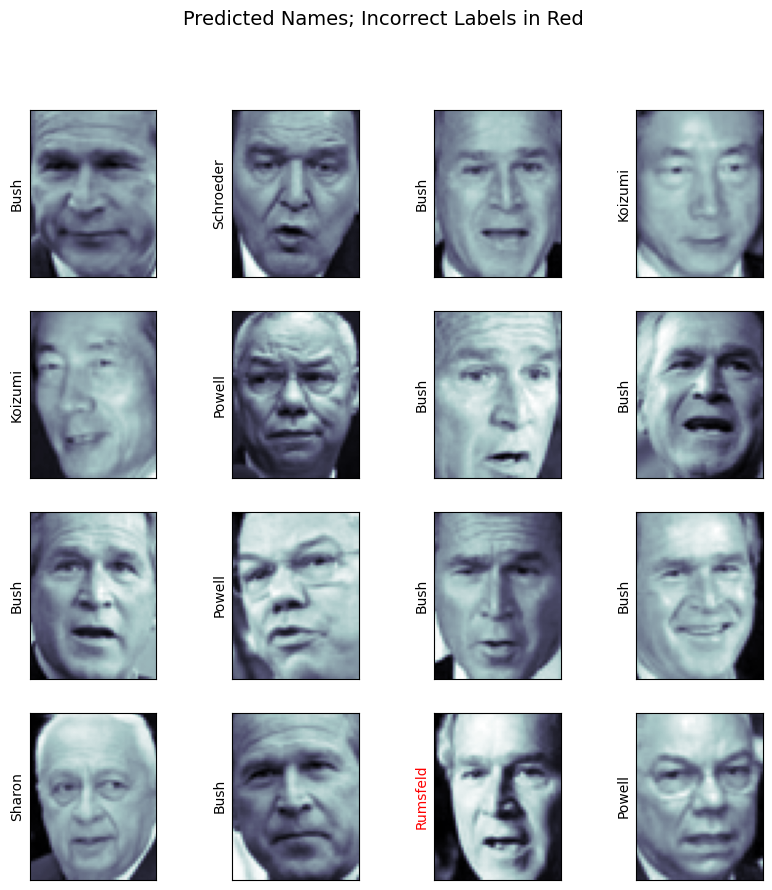

In [46]:
fig, ax = plt.subplots(4, 4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
  axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
  color='black' if y_predicted[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'Predicted Label')

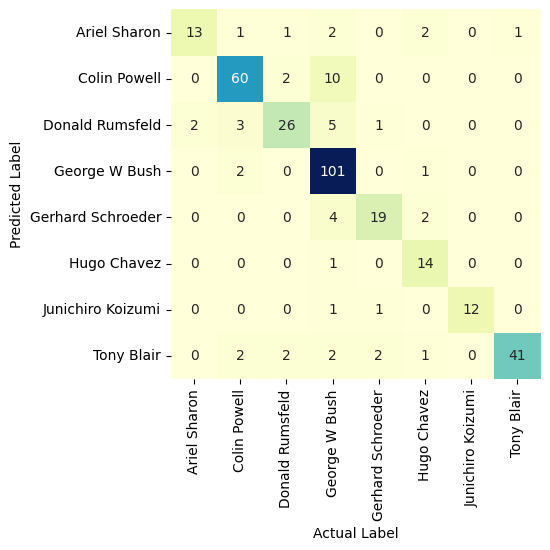

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# compare the actual label against the predicted label
mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlGnBu',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

# Save the Model

In [49]:
import pickle
# Save to file in the current working directory
pkl_filename = "svm_model.pkl"
# save your model that was created above (lg_model)
with open(pkl_filename, 'wb') as file:
  pickle.dump(model, file)

In [50]:
# Load from file
with open(pkl_filename, 'rb') as file:
  pickle_model = pickle.load(file)
# Lets test the mode loaded from a file and check results
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)

Test score: 84.87 %


In [51]:
# you can save your test set as a data frame as below
df = pd.DataFrame(X_test)
# add the label
df['Label'] = y_test
# save to csv
df.to_csv('Xy_test.csv', index=False)

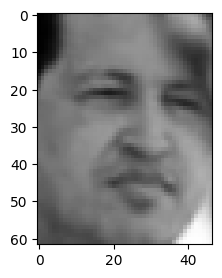

In [52]:
# set figure size
fig = plt.figure(figsize=(3,3))
# split features and labels into two different dataframes
features = df.loc[:, df.columns != 'Label']
labels = df['Label'].to_numpy()

# Change i to view different images
i = 23
# notice we convert it to numpy array and reshape it
image_to_show = features.iloc[i].to_numpy()
# reshape it to fit our model
image_to_show = image_to_show.reshape(62, 47)
# fig.su[title('This is ',labels[0:1], size=14)
label = faces.target_names[labels[i]]
if 1==1:
  color='black'
else:
  color='red'
#fig.suptitle(label,s ize=14)

plt.imshow(image_to_show, cmap=plt.get_cmap('gray'))
plt.show()

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

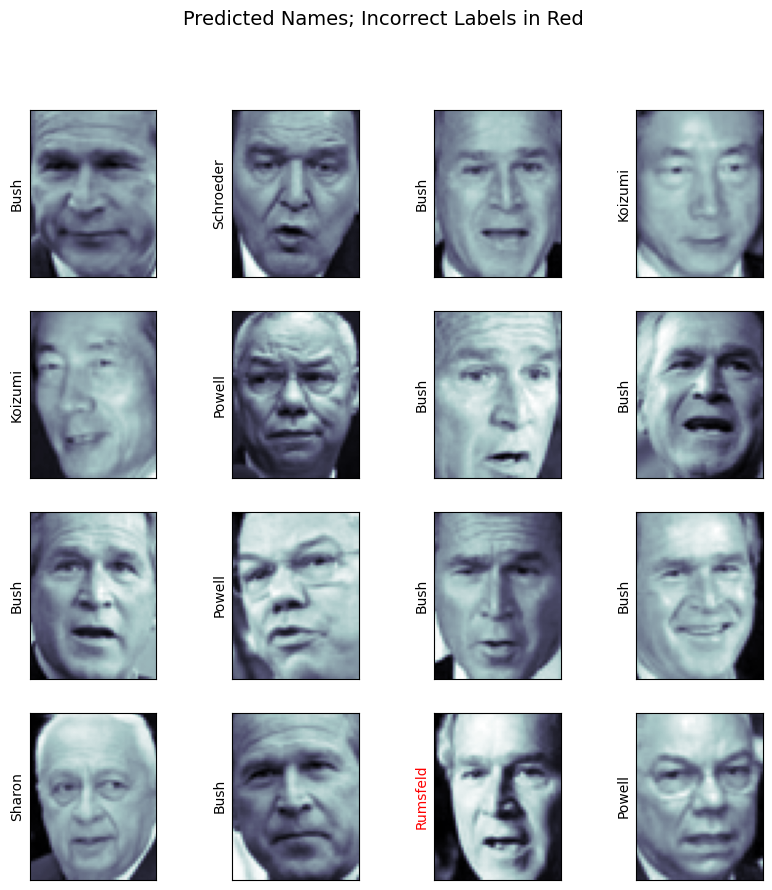

In [53]:
y_predictedp = pickle_model.predict(X_test)

fig, ax = plt.subplots(4, 4, figsize=(10,10))
for i, axi in enumerate(ax.flat):
  axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
                 color='black' if y_predictedp[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)